## Les différentes étapes du preprocessing
1. Diviser le dataset en trainset et testset
2. Traiter les valeurs manquantes s'il y en a
3. Faire de la feature engineering si possible (Créer des variables nouvelles à partir des variables existantes)
4. Traiter les valeurs aberrantes s'il y en a (optionnel)
5. Traiter les labels rares s'il y en a
6. Faire l'encodage des variables nominales
7. Faire d'autres tansformations (normalisation, transformer les données en distributions normales)

N.B: Il est conseillé de faire chacune de ces étapes en créant des fonctions. Cela permet d'essayer plusieurs idées.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('BankChurners.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
data_1 = data.iloc[:,1:21]
data_1.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df = data_1.copy()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state = 0)

In [8]:
trainset["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    6783
Attrited Customer    1318
Name: count, dtype: int64

In [9]:
testset["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    1717
Attrited Customer     309
Name: count, dtype: int64

In [10]:
var_cat = [i for i in df.columns if df[i].dtypes == 'O']
var_cat

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

Nous allons ici essayer de combiner certains labels dans la variable Card_Category. La raison est que dans l'EDA, 
nous avons vu qu'il y avait 0% de carte Platinum et Gold moins de 2%. Les combiner permettrait de reduire no seulement le bruit dans
notre dataset mais aussi de réduire le nombre de variables quand on va faire du one hot encoding sur nos variables catégorielles

In [11]:
def find_frequent_labels(df, var, rare_perc):
    
    # fonction qui retrouve les labels qui constituent moins d'un certain
    # pourcentage dans une variable donnée
    
    df = df.copy()
    
    tmp = df.groupby(var)[var].count() / len(df)
    
    return tmp[tmp > rare_perc].index


for var in var_cat:
    
    # trouver les catégories fréquentes
    frequent_ls = find_frequent_labels(trainset, var, 0.02)
    
    # Remplacer les catégories rares par le label 'Rare'
    trainset[var] = np.where(trainset[var].isin(
        frequent_ls), trainset[var], 'Rare')
    
    testset[var] = np.where(testset[var].isin(
        frequent_ls), testset[var], 'Rare')

In [12]:
testset['Card_Category'].value_counts()

Card_Category
Blue      1883
Silver     113
Rare        30
Name: count, dtype: int64

In [13]:
trainset['Card_Category'].value_counts()

Card_Category
Blue      7553
Silver     442
Rare       106
Name: count, dtype: int64

In [14]:
## On voit que le label platinum et Gold dans la feature Card_Category a été supprimée car il a moins 1% d'occurence

In [15]:
X_train = trainset.drop('Attrition_Flag', axis = 1)
y_train = trainset['Attrition_Flag']
X_test = testset.drop('Attrition_Flag', axis = 1)
y_test = testset['Attrition_Flag']

## Encodage des variables catégorielles

In [16]:
def encodage(df):
    code = {'Existing Customer':0,
            'Attrited Customer':1,
            'M':0,
            'F':1
            }
    
    df = df.map(code)
        
    return df

In [17]:
y_train = encodage(y_train)
y_test = encodage(y_test)
X_train['Gender'] = encodage(X_train['Gender'])
X_test['Gender'] = encodage ( X_test['Gender'])

In [18]:
y_test.value_counts()

Attrition_Flag
0    1717
1     309
Name: count, dtype: int64

In [19]:
vars_cat = ['Education_Level','Marital_Status','Income_Category','Card_Category']

for var in vars_cat:
    
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([X_test,
                        pd.get_dummies(X_test[var], prefix=var, drop_first=True)
                        ], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((8101, 31), (2026, 31))

In [20]:
X_test

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Rare,Card_Category_Silver
3358,44,0,5,39,5,2,0,16034.0,1597,14437.0,0.775,3628,59,0.903,0.100,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
9951,44,1,3,34,2,3,3,26021.0,0,26021.0,1.040,8898,60,0.538,0.000,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
3848,37,1,3,26,3,1,2,2917.0,2216,701.0,0.810,4524,67,0.489,0.760,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
1666,34,0,1,36,6,2,3,3735.0,1285,2450.0,1.034,1877,33,1.200,0.344,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False
8383,51,1,4,33,2,4,3,3068.0,2071,997.0,0.854,5524,71,0.972,0.675,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,31,1,1,18,3,1,3,3399.0,1800,1599.0,0.752,13148,121,0.806,0.530,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
2872,37,1,3,25,3,2,4,2282.0,0,2282.0,0.741,2751,68,0.659,0.000,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
4424,52,1,2,43,3,2,4,1822.0,1605,217.0,0.756,2538,39,0.696,0.881,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
7470,42,1,3,36,4,2,2,2526.0,2048,478.0,0.716,4267,72,0.800,0.811,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False


In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [22]:
# create scaler
#scaler = StandardScaler()

#  fit  the scaler to the train set
#scaler.fit(X_train) 

# transform the train and test set
#X_train = scaler.transform(X_train)

#X_test = scaler.transform(X_test)

In [23]:
model = make_pipeline(StandardScaler(),LogisticRegression(C=0.0005, random_state=0))

model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0005, random_state=0))])

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
class_ = model.predict(X_train)
pred = model.predict_proba(X_train)[:,1]

# determine accurcy and roc
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(X_test)
pred = model.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, class_))
print(classification_report(y_test, class_))

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8881829227178452
train accuracy: 0.844957412665103

[[1717    0]
 [ 296   13]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1717
           1       1.00      0.04      0.08       309

    accuracy                           0.85      2026
   macro avg       0.93      0.52      0.50      2026
weighted avg       0.88      0.85      0.79      2026

test roc-auc: 0.8812785904518493
test accuracy: 0.8538993089832182



In [26]:
TP = 13
FN = 296
TN = 1717
FP = 0

In [27]:
# Ces métriques concernent uniquement la classe positive qui est ici la classe 1 c-a-d les clients qui se sont désabonnés.
# Notre objectif ici est d'avoir un modèle modèle qui capture le plus de plus de clients qui se désabonnent
Precision = TP/(TP+FP)
Recall= TP/(TP+FN)
f1_score = 2*(Precision*Recall)/(Precision+Recall)

In [28]:
print('Precision:', round(Precision,2))
print('Recall:', round(Recall,2))
print('f1_score:', round(f1_score,2))

Precision: 1.0
Recall: 0.04
f1_score: 0.08


In [29]:
# Pour la classe 0, c-a-d ceux qui ne se sont pas désabonés, les formules sont les suivantes:
Precision_0 = TN/(TN+FN)
Recall_0= TN/(TN+FP)
f1_score_0 = 2*(Precision_0*Recall_0)/(Precision_0+Recall_0)

In [30]:
print('Precision_0:', round(Precision_0,2))
print('Recall_0:', round(Recall_0,2))
print('f1_score_0:', round(f1_score_0,2))

Precision_0: 0.85
Recall_0: 1.0
f1_score_0: 0.92


In [31]:
class_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
#from sklearn.model_selection import GridSearchCV

In [33]:
#LR =  LogisticRegression()
#LRparam_grid = {
    #'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    #'penalty': ['l1', 'l2'],
    #'max_iter': list(range(100,800,100)),
    #'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#}
#LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
#LR_search.fit(X_train , y_train)
#LR_search.best_params_
# summarize
#print('Mean Accuracy: %.3f' % LR_search.best_score_)
#print('Config: %s' % LR_search.best_params_)

In [34]:
#final_model = LR_search.best_estimator_

In [35]:
#final_model

In [36]:

#class_ = final_model.predict(X_train)
#pred = final_model.predict_proba(X_train)[:,1]

# determine roc_auc score and accuracy
#print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
#print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
#print()

# make predictions for test set
#class_ = final_model.predict(X_test)
#pred = final_model.predict_proba(X_test)[:,1]
#print(confusion_matrix(y_test, class_))
#print(classification_report(y_test, class_))

# determine roc_auc score and accuracy
#print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
#print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
#print()

## Procédure d'évaluation

In [37]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [38]:
def model_evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

## Mise en place du modèle

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [40]:
pre_processor = make_pipeline(SelectKBest(f_classif, k=10))

In [41]:
RandomForest = make_pipeline(pre_processor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(pre_processor, AdaBoostClassifier(random_state=0))
GradientBoost = make_pipeline(pre_processor,GradientBoostingClassifier(random_state = 0))
NaiveBayes = make_pipeline(pre_processor, GaussianNB ())
SVM = make_pipeline(pre_processor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(pre_processor, StandardScaler(), KNeighborsClassifier())

In [42]:
models_dict = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'GBT': GradientBoost,
                  'GNB': NaiveBayes
                 }

RandomForest
[[1690   27]
 [  50  259]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1717
           1       0.91      0.84      0.87       309

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

AdaBoost
[[1685   32]
 [  87  222]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1717
           1       0.87      0.72      0.79       309

    accuracy                           0.94      2026
   macro avg       0.91      0.85      0.88      2026
weighted avg       0.94      0.94      0.94      2026

SVM
[[1670   47]
 [  78  231]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1717
           1       0.83      0.75      0.79       309

    accuracy                           0.94      2026
   macro avg       0.

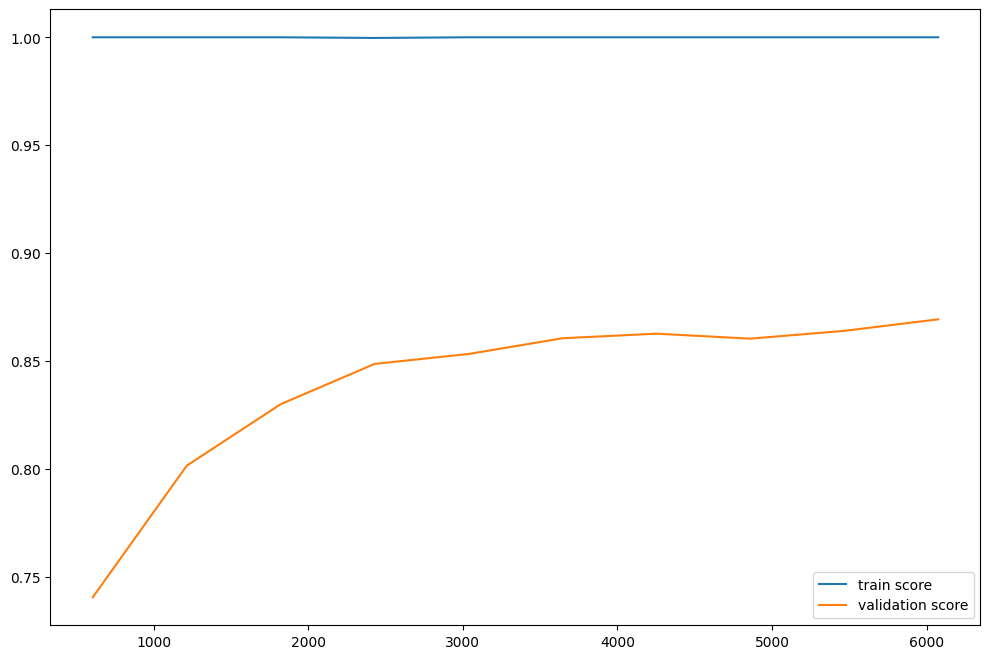

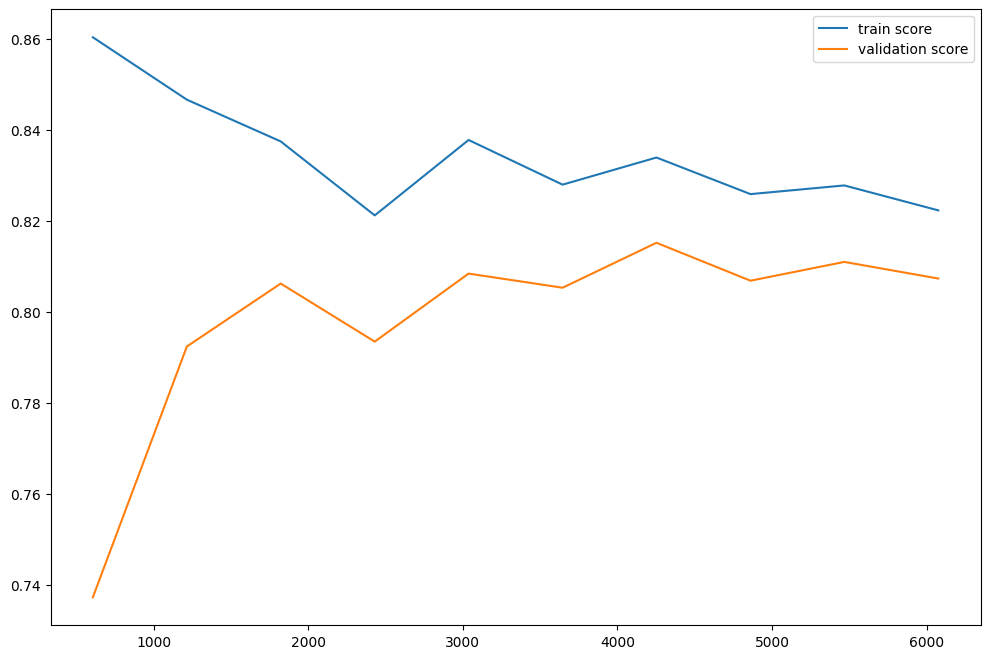

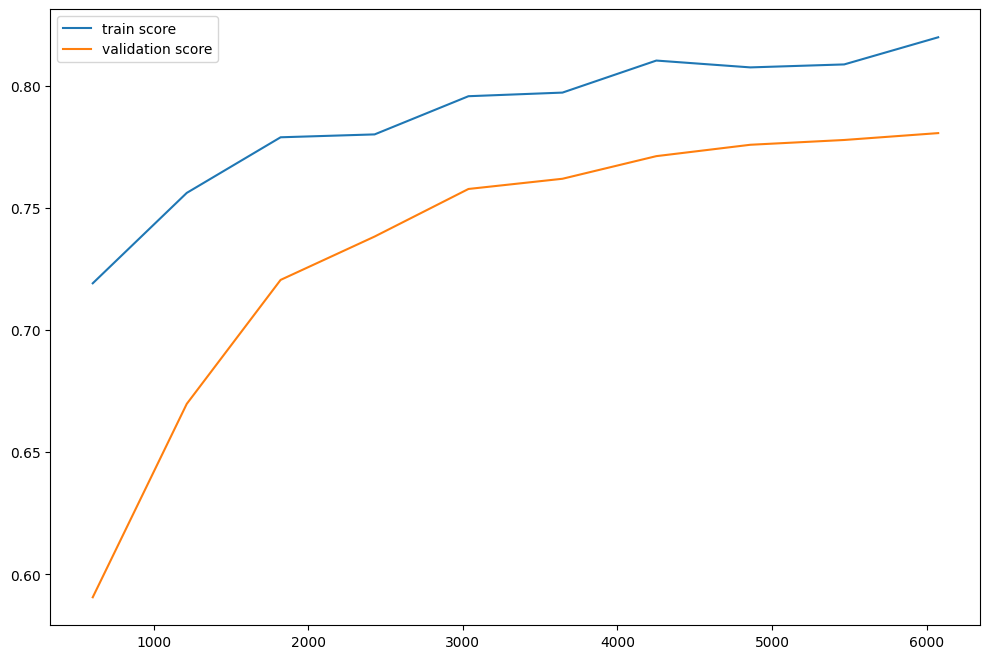

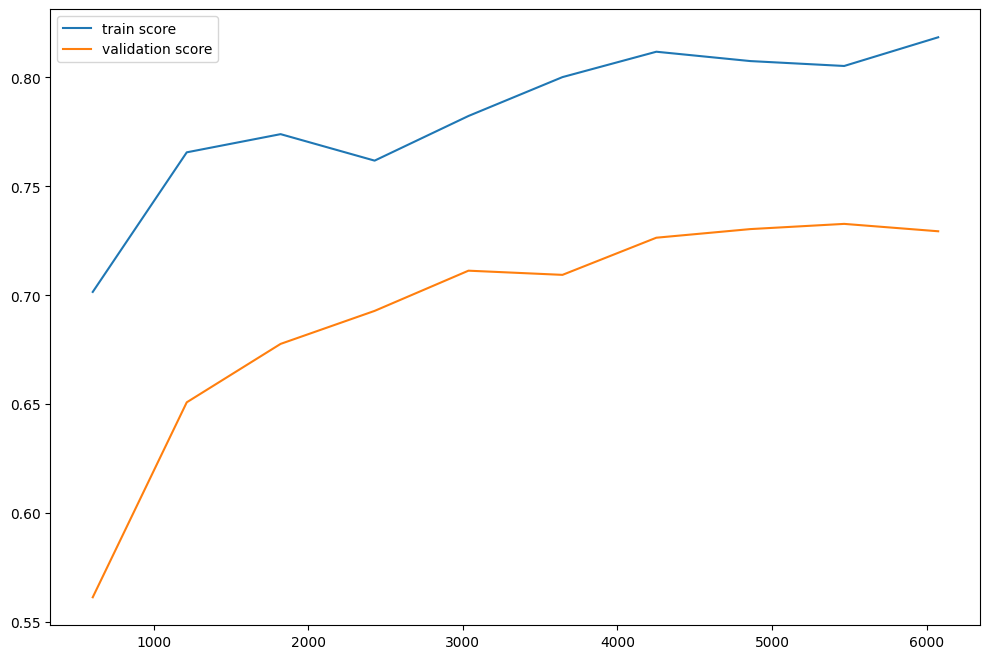

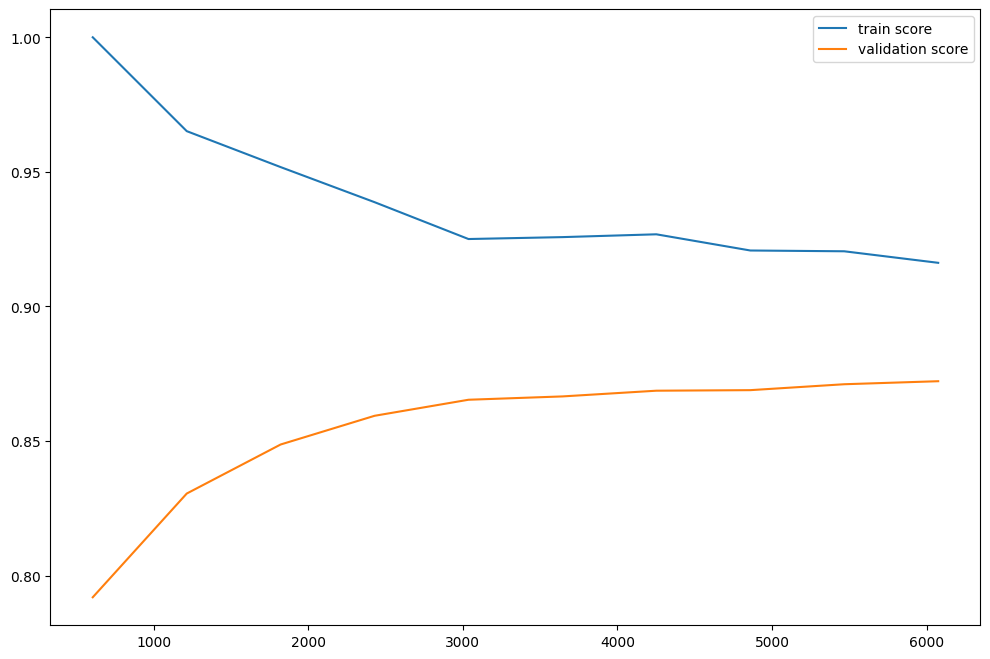

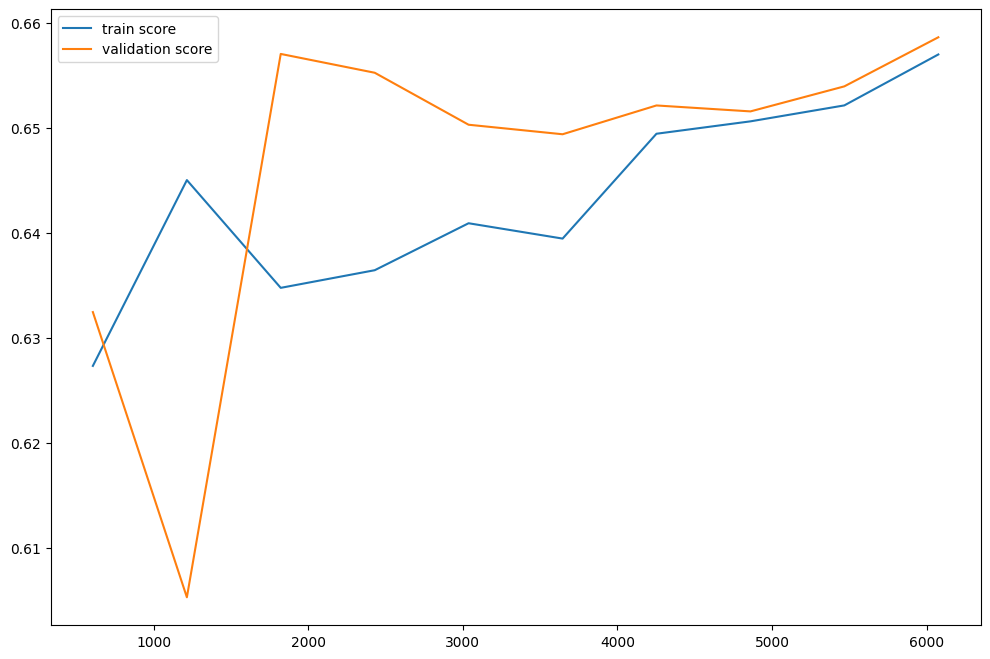

In [43]:
for name, model in models_dict.items():
    print(name)
    model_evaluation(model)

In [44]:
SVM

Pipeline(steps=[('pipeline', Pipeline(steps=[('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [45]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [46]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000],
               
               #'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(7,11)}


In [47]:
grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 10, 'svc__C': 3000, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1717
           1       0.82      0.71      0.76       309

    accuracy                           0.93      2026
   macro avg       0.88      0.84      0.86      2026
weighted avg       0.93      0.93      0.93      2026



[[1668   49]
 [  91  218]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1717
           1       0.82      0.71      0.76       309

    accuracy                           0.93      2026
   macro avg       0.88      0.84      0.86      2026
weighted avg       0.93      0.93      0.93      2026



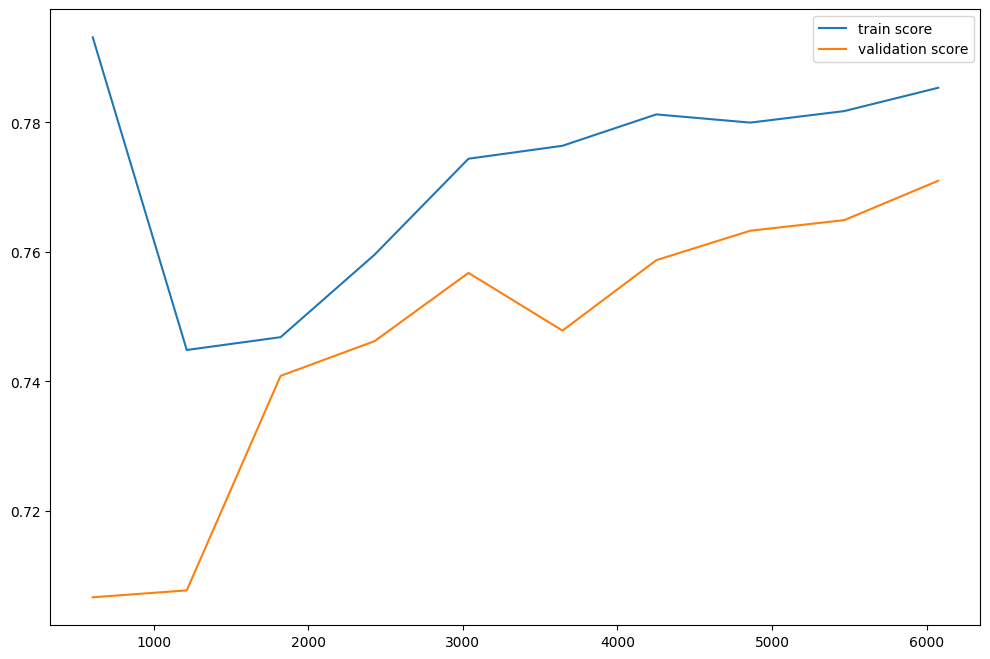

In [48]:
model_evaluation(grid.best_estimator_)

## OPTIMISATION DU RANDOMFOREST

In [49]:
rf_hyper_params = {'randomforestclassifier__n_estimators': [100,200,300,400,600,700,800],
                   'randomforestclassifier__max_depth':[5, 8, 15,20],
                   'randomforestclassifier__min_samples_split': [2, 5, 10, 15, 100],
                   'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10], 
                   'randomforestclassifier__max_features': [ 3, 10,15],
                   'randomforestclassifier__criterion': ['gini', 'entropy']
                  }

In [50]:
rf_grid = RandomizedSearchCV(RandomForest, rf_hyper_params, scoring='recall', cv=4, n_iter = 40)

rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_)

y_pred = rf_grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_depth': 15, 'randomforestclassifier__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1717
           1       0.87      0.85      0.86       309

    accuracy                           0.96      2026
   macro avg       0.92      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



In [51]:
print(confusion_matrix(y_test, y_pred))

[[1679   38]
 [  45  264]]


## OPTIMISATION DU SVM AVEC PRECISION RECALL CURVE

In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
precision, recall, threshold = precision_recall_curve(y_test, SVM.decision_function(X_test))

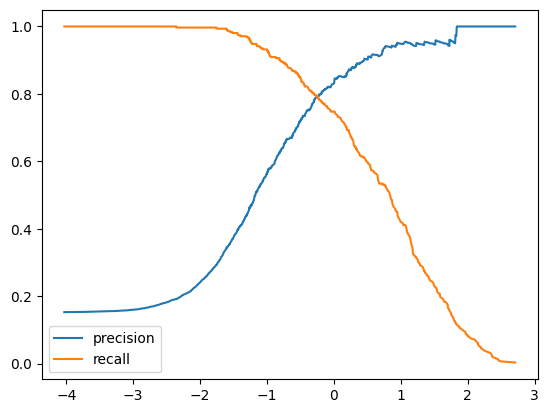

In [54]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [55]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [56]:
y_pred = model_final(SVM, X_test, threshold=-0.5)

In [57]:
f1_score(y_test, y_pred)

0.7797619047619048

In [58]:
from sklearn.metrics import recall_score, precision_score

In [59]:
recall_score(y_test, y_pred)

0.8478964401294499

In [60]:
print(confusion_matrix(y_test, y_pred))

[[1616  101]
 [  47  262]]


In [61]:
precision_score(y_test,y_pred)

0.721763085399449